In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Load running data from a CSV (or parse from markdown if necessary)
def load_running_data(file_path="running_log.csv"):
    """Load running log from a CSV file."""
    df = pd.read_csv(file_path)
    df["Date"] = pd.to_datetime(df["Date"])  # Ensure Date is in datetime format
    df["Time (min)"] = df["Time"].apply(lambda x: sum(int(t) * 60**i for i, t in enumerate(reversed(x.split(":")))) / 60)
    df["Pace (min/mile)"] = df["Time (min)"] / df["Distance (miles)"]
    return df.sort_values("Date")

# Plot Distance vs Time
def plot_distance_time(df):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["Date"], y=df["Distance (miles)"], marker="o", label="Distance per run")
    plt.xlabel("Date")
    plt.ylabel("Distance (miles)")
    plt.title("Running Distance Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Cumulative Distance Over Time
def plot_cumulative_distance(df):
    df["Cumulative Distance"] = df["Distance (miles)"].cumsum()
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["Date"], y=df["Cumulative Distance"], marker="o", color="green")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Distance (miles)")
    plt.title("Total Distance Run Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Histogram of Run Distances
def plot_histogram(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(df["Distance (miles)"], bins=10, kde=True)
    plt.xlabel("Distance (miles)")
    plt.ylabel("Frequency")
    plt.title("Distribution of Run Distances")
    plt.show()

# Pace Over Time
def plot_pace(df):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=df["Date"], y=df["Pace (min/mile)"], marker="o", color="red")
    plt.xlabel("Date")
    plt.ylabel("Pace (min/mile)")
    plt.title("Running Pace Over Time")
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()

# Main function to execute plots
def main():
    file_path = "running_log.csv"  # Update if needed
    df = load_running_data(file_path)
    
    plot_distance_time(df)
    plot_cumulative_distance(df)
    plot_histogram(df)
    plot_pace(df)

if __name__ == "__main__":
    main()

ParserError: Error tokenizing data. C error: Expected 4 fields in line 34, saw 5


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the running log data
file_path = "/Users/zakkhan/Documents/GitHub/zakaria-a-khan.github.io/running_log.csv"
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')

# Clean up missing values (e.g., missing time for some entries)
data['Time (minutes)'] = pd.to_numeric(data['Time (minutes)'], errors='coerce')
data['Distance (miles)'] = pd.to_numeric(data['Distance (miles)'], errors='coerce')

# Create a new column for Pace (minutes per mile)
data['Pace (min/mile)'] = data['Time (minutes)'] / data['Distance (miles)']

# Create a plot for Distance vs. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance (miles)'], marker='o', linestyle='-', color='b')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (miles)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Time (minutes) vs. Date to observe how time changes
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Time (minutes)'], marker='s', linestyle='-', color='g')
plt.title("Time Over Time")
plt.xlabel("Date")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Pace (min/mile) vs. Date to observe pace over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pace (min/mile)'], marker='^', linestyle='-', color='r')
plt.title("Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (minutes per mile)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for pace (min/mile) to visualize distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['Pace (min/mile)'].dropna(), vert=False)
plt.title("Pace Distribution")
plt.xlabel("Pace (min/mile)")
plt.tight_layout()
plt.show()

# Scatter plot of Distance vs. Time with color indicating different notes (e.g., treadmill, outside)
colors = {'Outside':'orange', 'Treadmill':'blue'}
data['Color'] = data['Notes'].apply(lambda x: next((color for key, color in colors.items() if key in x), 'gray'))

plt.figure(figsize=(10, 6))
plt.scatter(data['Distance (miles)'], data['Time (minutes)'], c=data['Color'], alpha=0.6)
plt.title("Distance vs. Time (Colored by Notes)")
plt.xlabel("Distance (miles)")
plt.ylabel("Time (minutes)")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Outside'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Treadmill')],
           loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate weekly distance totals
data['Week'] = data['Date'].dt.to_period('W')
weekly_data = data.groupby('Week').agg({'Distance (miles)': 'sum'}).reset_index()

# Plot weekly distance totals
plt.figure(figsize=(10, 6))
plt.bar(weekly_data['Week'].astype(str), weekly_data['Distance (miles)'], color='purple')
plt.title("Total Weekly Distance")
plt.xlabel("Week")
plt.ylabel("Total Distance (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: time data "12/24/24" doesn't match format "%Y-%m-%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the running log data with error handling for malformed rows
file_path = "/Users/zakkhan/Documents/GitHub/zakaria-a-khan.github.io/running_log.csv"
data = pd.read_csv(file_path, error_bad_lines=False, warn_bad_lines=True)

# Convert 'Date' column to datetime, allowing pandas to infer the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=False)

# Check if there are any invalid dates and print the rows
invalid_dates = data[data['Date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries found:")
    print(invalid_dates)

# Clean up missing values (e.g., missing time for some entries)
data['Time (minutes)'] = pd.to_numeric(data['Time (minutes)'], errors='coerce')
data['Distance (miles)'] = pd.to_numeric(data['Distance (miles)'], errors='coerce')

# Create a new column for Pace (minutes per mile)
data['Pace (min/mile)'] = data['Time (minutes)'] / data['Distance (miles)']

# Create a plot for Distance vs. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance (miles)'], marker='o', linestyle='-', color='b')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (miles)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Time (minutes) vs. Date to observe how time changes
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Time (minutes)'], marker='s', linestyle='-', color='g')
plt.title("Time Over Time")
plt.xlabel("Date")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Pace (min/mile) vs. Date to observe pace over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pace (min/mile)'], marker='^', linestyle='-', color='r')
plt.title("Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (minutes per mile)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for pace (min/mile) to visualize distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['Pace (min/mile)'].dropna(), vert=False)
plt.title("Pace Distribution")
plt.xlabel("Pace (min/mile)")
plt.tight_layout()
plt.show()

# Scatter plot of Distance vs. Time with color indicating different notes (e.g., treadmill, outside)
colors = {'Outside':'orange', 'Treadmill':'blue'}
data['Color'] = data['Notes'].apply(lambda x: next((color for key, color in colors.items() if key in x), 'gray'))

plt.figure(figsize=(10, 6))
plt.scatter(data['Distance (miles)'], data['Time (minutes)'], c=data['Color'], alpha=0.6)
plt.title("Distance vs. Time (Colored by Notes)")
plt.xlabel("Distance (miles)")
plt.ylabel("Time (minutes)")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Outside'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Treadmill')],
           loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate weekly distance totals
data['Week'] = data['Date'].dt.to_period('W')
weekly_data = data.groupby('Week').agg({'Distance (miles)': 'sum'}).reset_index()

# Plot weekly distance totals
plt.figure(figsize=(10, 6))
plt.bar(weekly_data['Week'].astype(str), weekly_data['Distance (miles)'], color='purple')
plt.title("Total Weekly Distance")
plt.xlabel("Week")
plt.ylabel("Total Distance (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'

/var/folders/0f/kz1f861n7p7dgkn6lzn38mxw0000gn/T/ipykernel_20249/257016114.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=False)


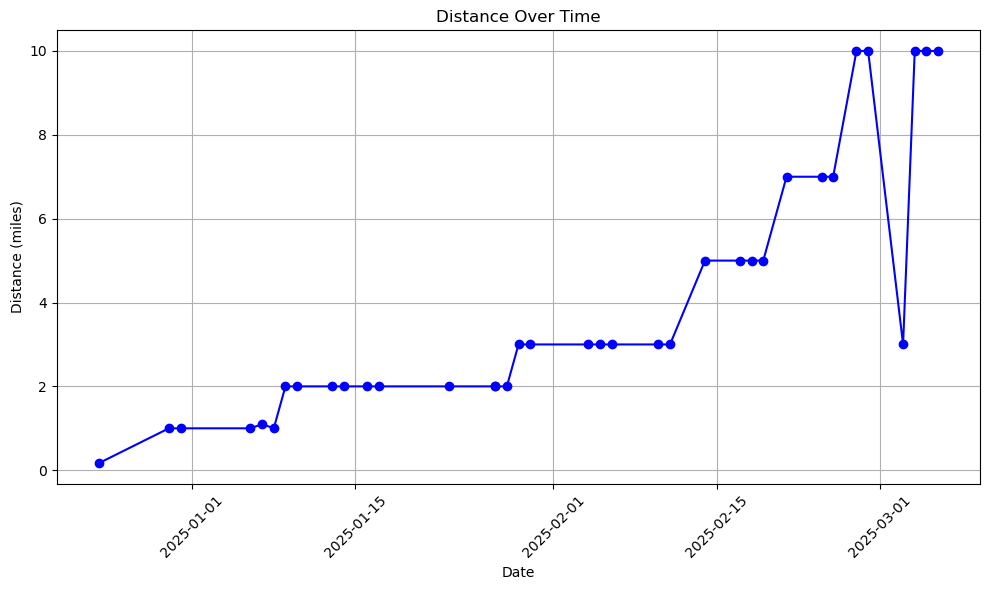

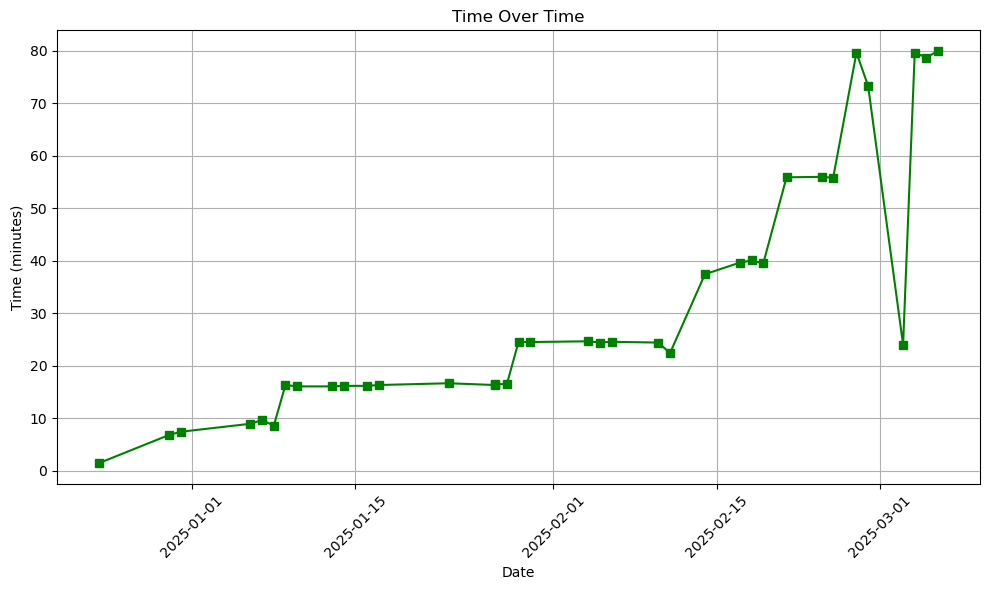

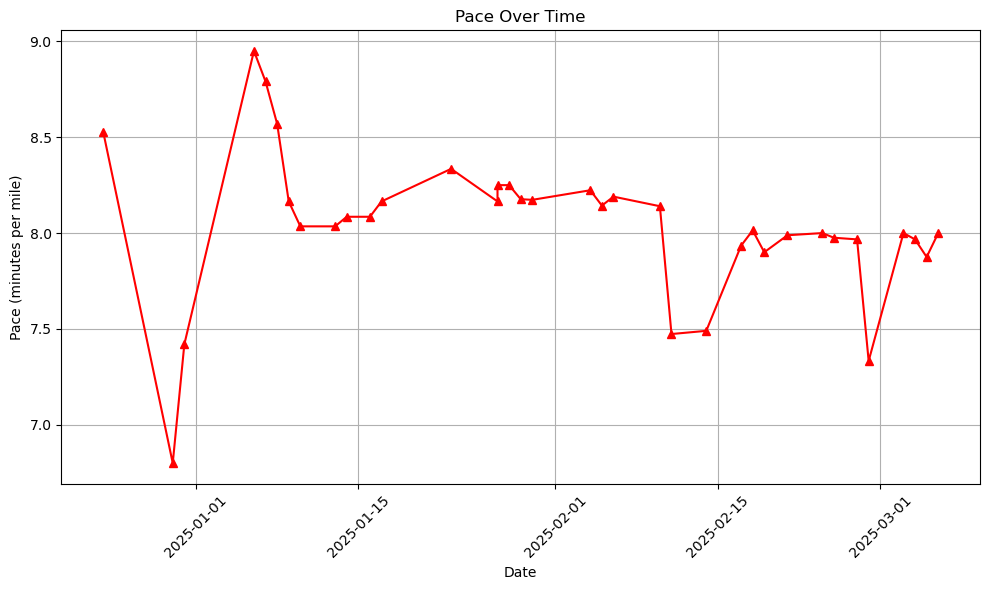

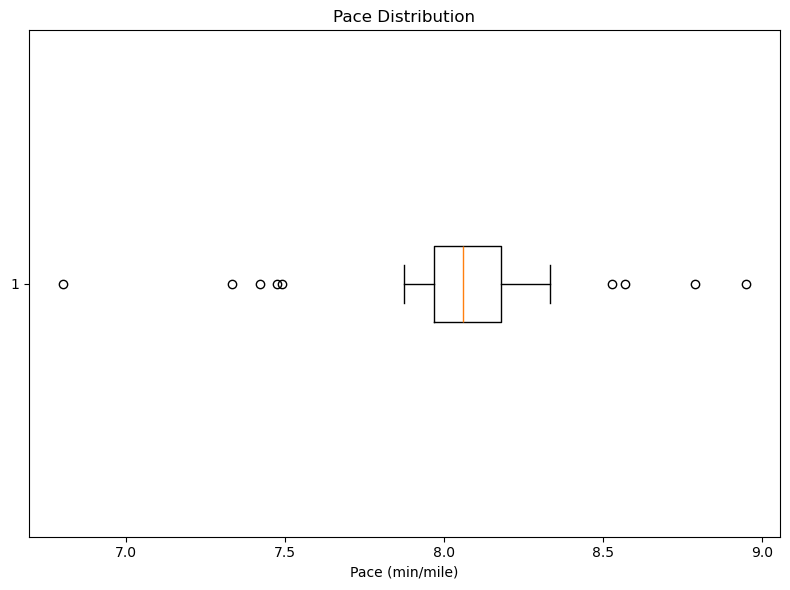

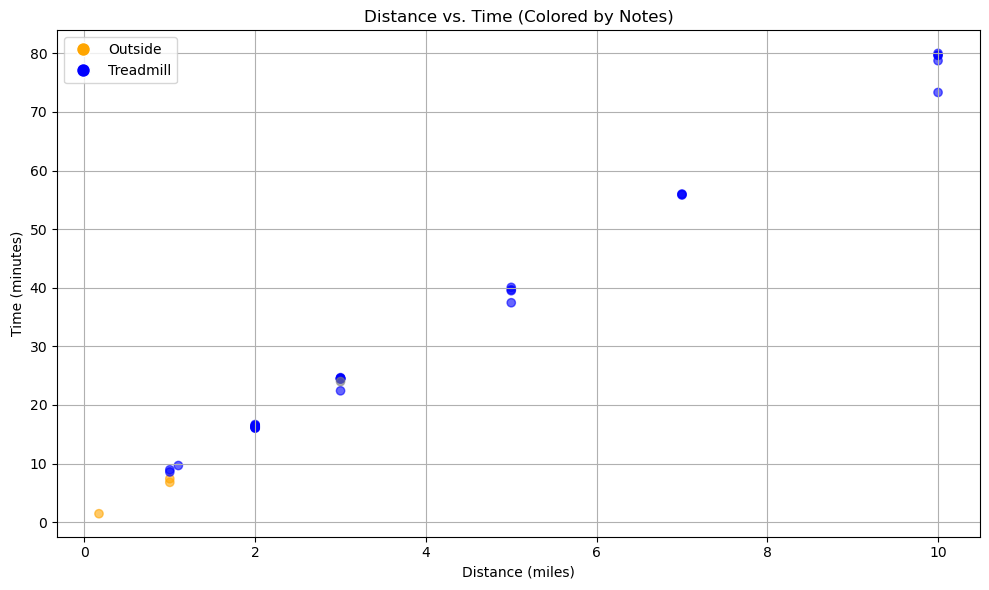

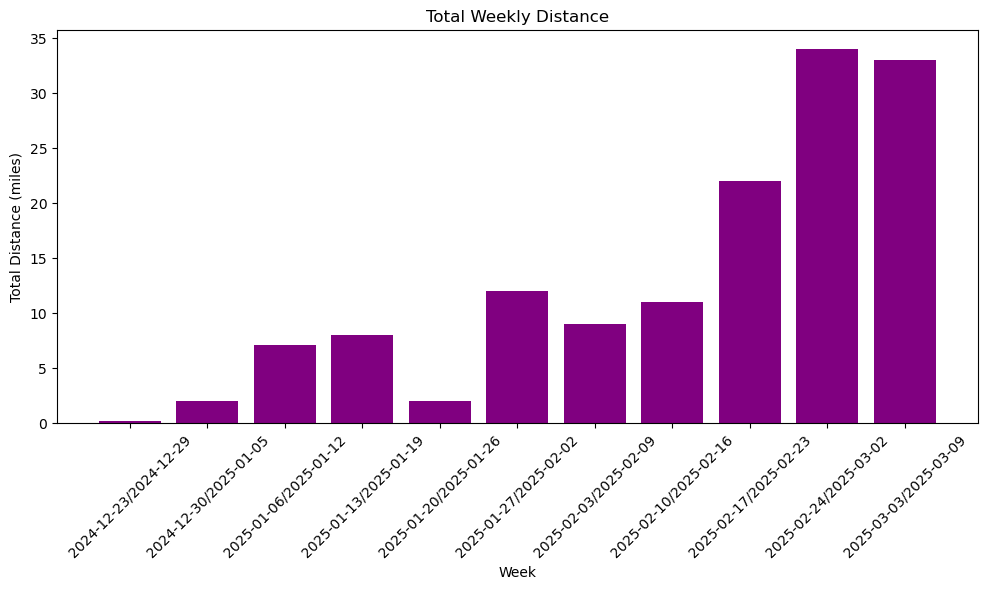

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the running log data with error handling for malformed rows
file_path = "/Users/zakkhan/Documents/GitHub/zakaria-a-khan.github.io/running_log.csv"
data = pd.read_csv(file_path, on_bad_lines='warn')  # 'warn' will display a warning for bad lines

# Convert 'Date' column to datetime, allowing pandas to infer the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', dayfirst=False)

# Check if there are any invalid dates and print the rows
invalid_dates = data[data['Date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries found:")
    print(invalid_dates)

# Clean up missing values (e.g., missing time for some entries)
data['Time (minutes)'] = pd.to_numeric(data['Time (minutes)'], errors='coerce')
data['Distance (miles)'] = pd.to_numeric(data['Distance (miles)'], errors='coerce')

# Create a new column for Pace (minutes per mile)
data['Pace (min/mile)'] = data['Time (minutes)'] / data['Distance (miles)']

# Create a plot for Distance vs. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance (miles)'], marker='o', linestyle='-', color='b')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (miles)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Time (minutes) vs. Date to observe how time changes
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Time (minutes)'], marker='s', linestyle='-', color='g')
plt.title("Time Over Time")
plt.xlabel("Date")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Pace (min/mile) vs. Date to observe pace over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pace (min/mile)'], marker='^', linestyle='-', color='r')
plt.title("Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (minutes per mile)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for pace (min/mile) to visualize distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['Pace (min/mile)'].dropna(), vert=False)
plt.title("Pace Distribution")
plt.xlabel("Pace (min/mile)")
plt.tight_layout()
plt.show()

# Scatter plot of Distance vs. Time with color indicating different notes (e.g., treadmill, outside)
colors = {'Outside':'orange', 'Treadmill':'blue'}
data['Color'] = data['Notes'].apply(lambda x: next((color for key, color in colors.items() if key in x), 'gray'))

plt.figure(figsize=(10, 6))
plt.scatter(data['Distance (miles)'], data['Time (minutes)'], c=data['Color'], alpha=0.6)
plt.title("Distance vs. Time (Colored by Notes)")
plt.xlabel("Distance (miles)")
plt.ylabel("Time (minutes)")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Outside'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Treadmill')],
           loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate weekly distance totals
data['Week'] = data['Date'].dt.to_period('W')
weekly_data = data.groupby('Week').agg({'Distance (miles)': 'sum'}).reset_index()

# Plot weekly distance totals
plt.figure(figsize=(10, 6))
plt.bar(weekly_data['Week'].astype(str), weekly_data['Distance (miles)'], color='purple')
plt.title("Total Weekly Distance")
plt.xlabel("Week")
plt.ylabel("Total Distance (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

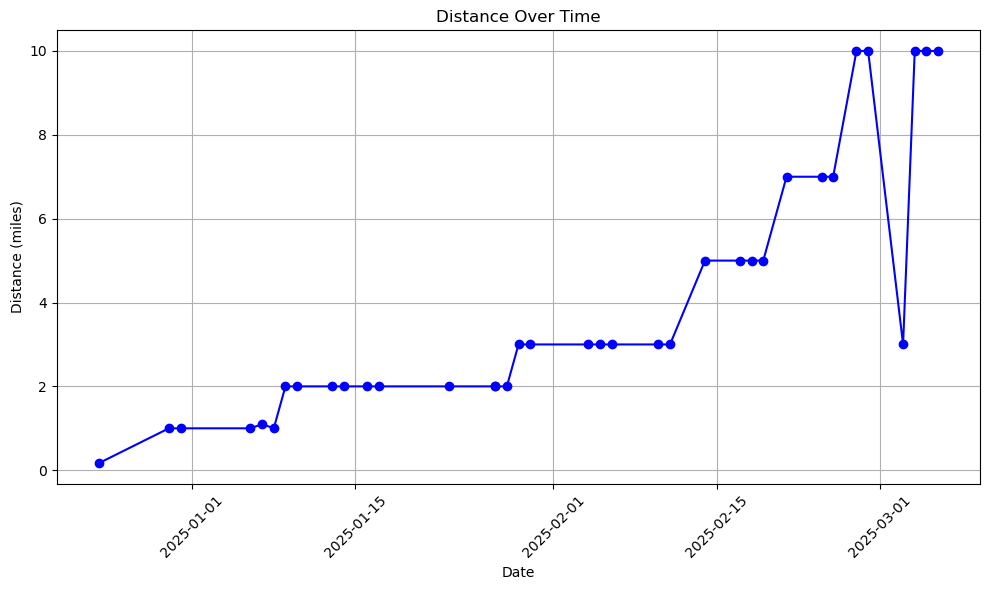

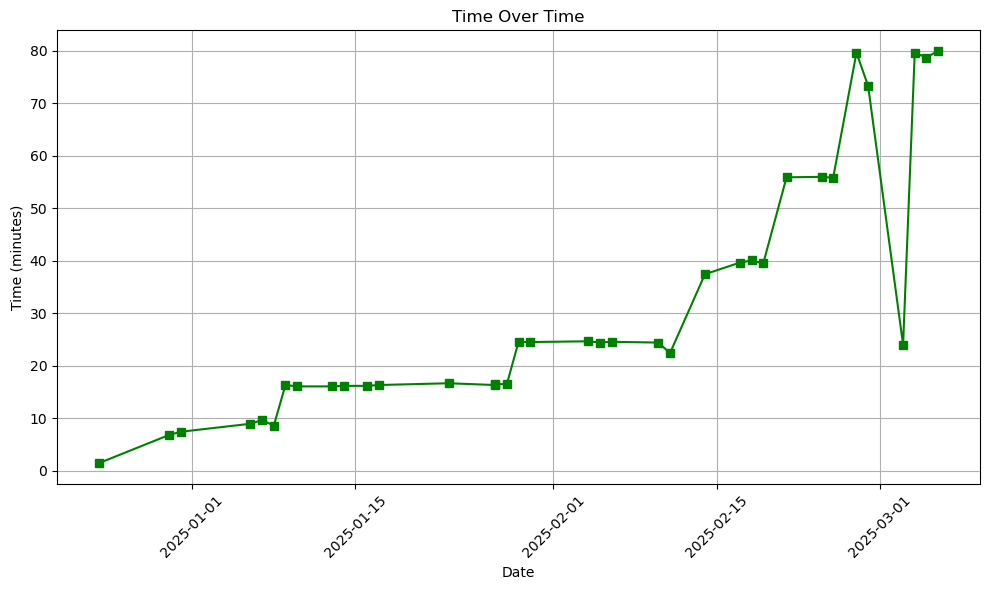

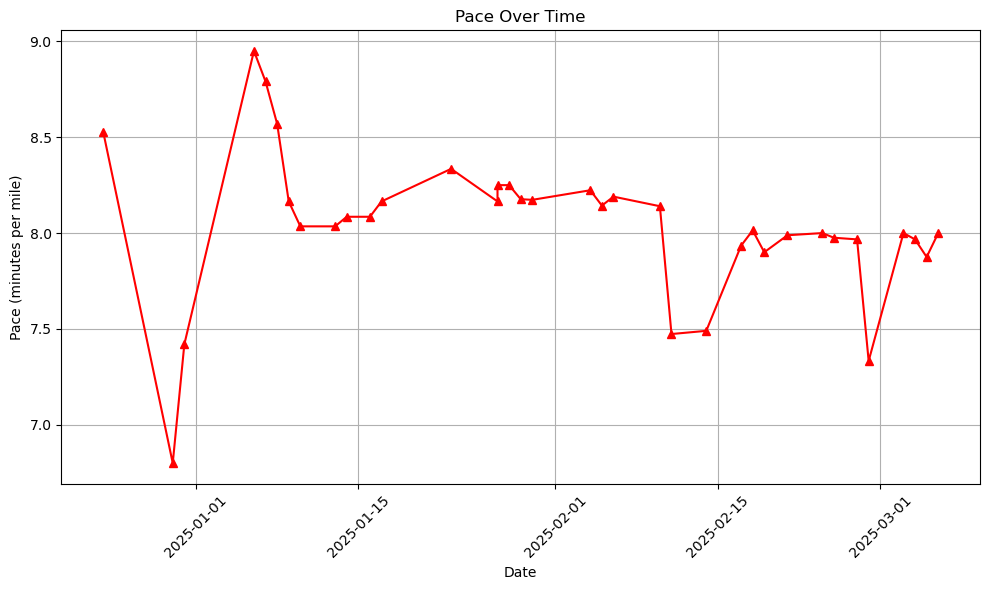

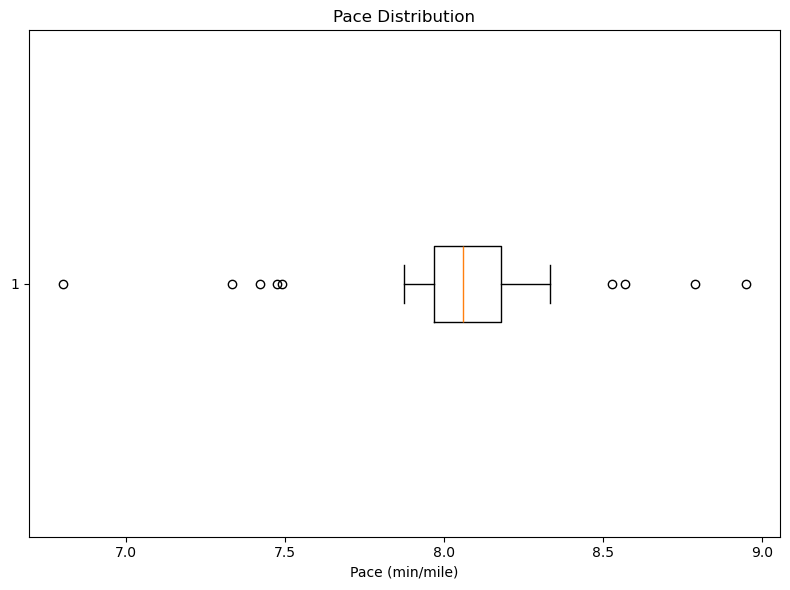

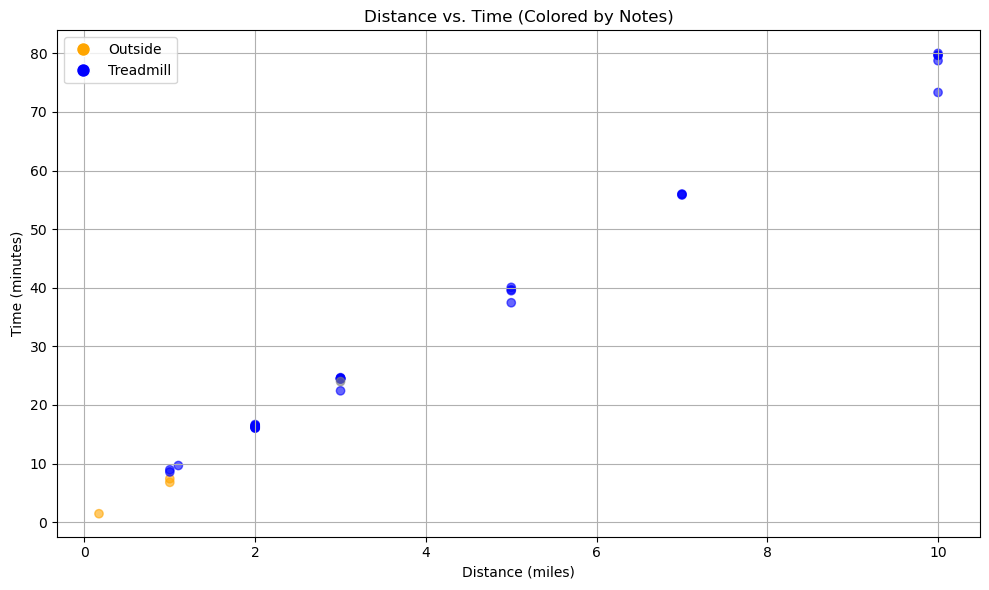

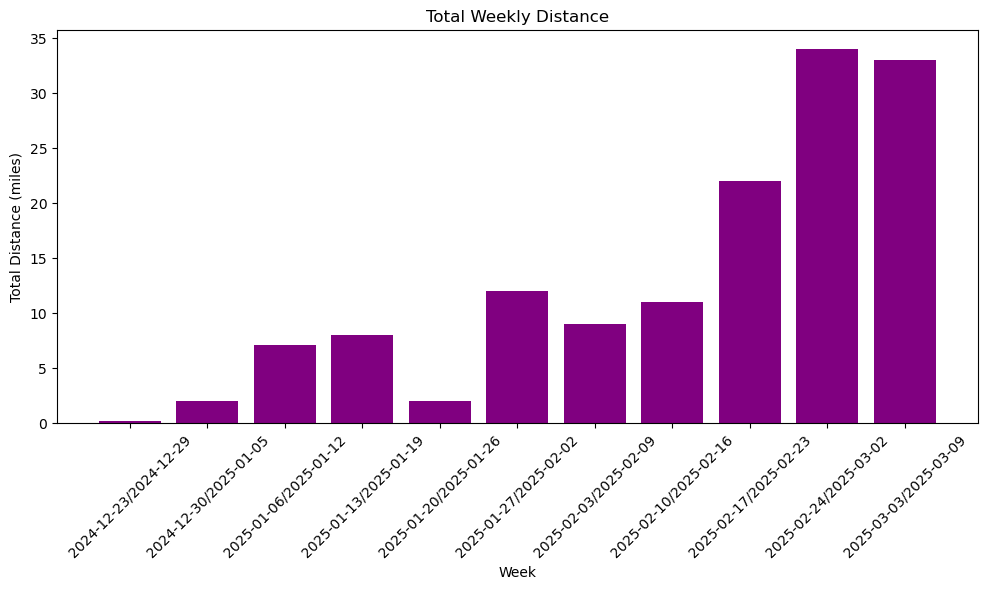

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the running log data with error handling for malformed rows
file_path = "/Users/zakkhan/Documents/GitHub/zakaria-a-khan.github.io/running_log.csv"
data = pd.read_csv(file_path, on_bad_lines='warn')  # 'warn' will display a warning for bad lines

# Convert 'Date' column to datetime, specifying the format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce', dayfirst=False)

# Check if there are any invalid dates and print the rows
invalid_dates = data[data['Date'].isna()]
if not invalid_dates.empty:
    print("Invalid date entries found:")
    print(invalid_dates)

# Clean up missing values (e.g., missing time for some entries)
data['Time (minutes)'] = pd.to_numeric(data['Time (minutes)'], errors='coerce')
data['Distance (miles)'] = pd.to_numeric(data['Distance (miles)'], errors='coerce')

# Create a new column for Pace (minutes per mile)
data['Pace (min/mile)'] = data['Time (minutes)'] / data['Distance (miles)']

# Create a plot for Distance vs. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance (miles)'], marker='o', linestyle='-', color='b')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (miles)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Time (minutes) vs. Date to observe how time changes
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Time (minutes)'], marker='s', linestyle='-', color='g')
plt.title("Time Over Time")
plt.xlabel("Date")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot Pace (min/mile) vs. Date to observe pace over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pace (min/mile)'], marker='^', linestyle='-', color='r')
plt.title("Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (minutes per mile)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Boxplot for pace (min/mile) to visualize distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['Pace (min/mile)'].dropna(), vert=False)
plt.title("Pace Distribution")
plt.xlabel("Pace (min/mile)")
plt.tight_layout()
plt.show()

# Scatter plot of Distance vs. Time with color indicating different notes (e.g., treadmill, outside)
colors = {'Outside':'orange', 'Treadmill':'blue'}
data['Color'] = data['Notes'].apply(lambda x: next((color for key, color in colors.items() if key in x), 'gray'))

plt.figure(figsize=(10, 6))
plt.scatter(data['Distance (miles)'], data['Time (minutes)'], c=data['Color'], alpha=0.6)
plt.title("Distance vs. Time (Colored by Notes)")
plt.xlabel("Distance (miles)")
plt.ylabel("Time (minutes)")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Outside'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Treadmill')],
           loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()

# Calculate weekly distance totals
data['Week'] = data['Date'].dt.to_period('W')
weekly_data = data.groupby('Week').agg({'Distance (miles)': 'sum'}).reset_index()

# Plot weekly distance totals
plt.figure(figsize=(10, 6))
plt.bar(weekly_data['Week'].astype(str), weekly_data['Distance (miles)'], color='purple')
plt.title("Total Weekly Distance")
plt.xlabel("Week")
plt.ylabel("Total Distance (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the running log data with error handling for malformed rows
file_path = "/Users/zakkhan/Documents/GitHub/zakaria-a-khan.github.io/running_log.csv"
data = pd.read_csv(file_path, on_bad_lines='warn')  # 'warn' will display a warning for bad lines

# Convert 'Date' column to datetime, specifying the format
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y', errors='coerce', dayfirst=False)

# Clean up missing values (e.g., missing time for some entries)
data['Time (minutes)'] = pd.to_numeric(data['Time (minutes)'], errors='coerce')
data['Distance (miles)'] = pd.to_numeric(data['Distance (miles)'], errors='coerce')

# Create a new column for Pace (minutes per mile)
data['Pace (min/mile)'] = data['Time (minutes)'] / data['Distance (miles)']

# Create a plot for Distance vs. Date
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Distance (miles)'], marker='o', linestyle='-', color='b')
plt.title("Distance Over Time")
plt.xlabel("Date")
plt.ylabel("Distance (miles)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('distance_over_time.png')  # Save plot to file
plt.close()  # Close the plot to avoid overlap in the next plot

# Plot Time (minutes) vs. Date to observe how time changes
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Time (minutes)'], marker='s', linestyle='-', color='g')
plt.title("Time Over Time")
plt.xlabel("Date")
plt.ylabel("Time (minutes)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('time_over_time.png')  # Save plot to file
plt.close()

# Plot Pace (min/mile) vs. Date to observe pace over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Pace (min/mile)'], marker='^', linestyle='-', color='r')
plt.title("Pace Over Time")
plt.xlabel("Date")
plt.ylabel("Pace (minutes per mile)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('pace_over_time.png')  # Save plot to file
plt.close()

# Boxplot for pace (min/mile) to visualize distribution
plt.figure(figsize=(8, 6))
plt.boxplot(data['Pace (min/mile)'].dropna(), vert=False)
plt.title("Pace Distribution")
plt.xlabel("Pace (min/mile)")
plt.tight_layout()
plt.savefig('pace_distribution.png')  # Save plot to file
plt.close()

# Scatter plot of Distance vs. Time with color indicating different notes (e.g., treadmill, outside)
colors = {'Outside':'orange', 'Treadmill':'blue'}
data['Color'] = data['Notes'].apply(lambda x: next((color for key, color in colors.items() if key in x), 'gray'))

plt.figure(figsize=(10, 6))
plt.scatter(data['Distance (miles)'], data['Time (minutes)'], c=data['Color'], alpha=0.6)
plt.title("Distance vs. Time (Colored by Notes)")
plt.xlabel("Distance (miles)")
plt.ylabel("Time (minutes)")
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Outside'),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Treadmill')],
           loc='best')
plt.grid(True)
plt.tight_layout()
plt.savefig('distance_vs_time_colored.png')  # Save plot to file
plt.close()

# Calculate weekly distance totals
data['Week'] = data['Date'].dt.to_period('W')
weekly_data = data.groupby('Week').agg({'Distance (miles)': 'sum'}).reset_index()

# Plot weekly distance totals
plt.figure(figsize=(10, 6))
plt.bar(weekly_data['Week'].astype(str), weekly_data['Distance (miles)'], color='purple')
plt.title("Total Weekly Distance")
plt.xlabel("Week")
plt.ylabel("Total Distance (miles)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('total_weekly_distance.png')  # Save plot to file
plt.close()